In [1]:
# https://en.wikipedia.org/wiki/Zero-crossing_rate

import os
import librosa
import librosa.display
import IPython.display as idp
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

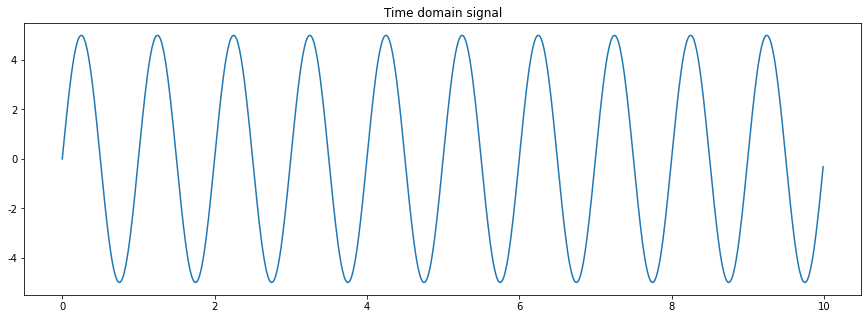

In [8]:
def get_sinusoid(AFP, LS):
    
    (A, f, phase) = AFP
    (L, step) = LS
    
    sinusoid = np.zeros(int(L/step))
    for i, _ in enumerate(sinusoid):
        sinusoid[i] = A * np.sin(2 * np.pi * (f * step * i + phase))
        
    return sinusoid

LS = (L, step) = (10, 0.01)

s1 = get_sinusoid((5, 1, 0), LS)
s2 = get_sinusoid((2, 3, 0), LS)
s3 = get_sinusoid((3, 4, 0), LS)

signal = s1 + s2 + s3
signal = s1

t = np.arange(s1.size) * step

plt.figure(figsize=(15,5))
plt.plot(t, signal)
plt.title('Time domain signal')
plt.show()
    

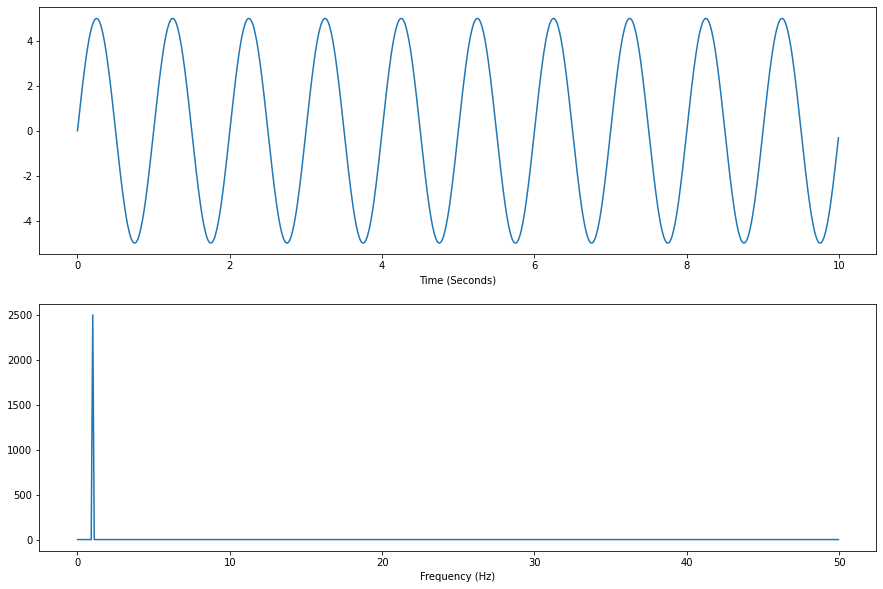

In [10]:
# The amplitude is related to the length of the signal

def plot_magnitude_spectrum(signal_info, f_ratio=1):
    (signal, sr) = signal_info
    
    msp = np.abs(np.fft.fft(signal))
    frequency = np.linspace(0, sr, msp.size)
    
    bins = int(frequency.size * f_ratio)

    plt.figure(figsize=(15,10))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(s1.size) * step, signal)
    plt.xlabel('Time (Seconds)')
    
    plt.subplot(2, 1, 2)
    plt.plot(frequency[0:bins], msp[0:bins])
    plt.xlabel('Frequency (Hz)')
    plt.show()
    

plot_magnitude_spectrum((signal, 1/step), 0.5)